In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("Zomatodata.csv")
df.head()
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Convert Data type for rate Column

In [75]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [76]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [78]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

1) What type of restaurant do the majority of customers order from?

->
For this is we will use the listed_in(type) columns => Buffet / dinning

In [79]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [80]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9260\3657486623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['listed_in(type)'], palette="husl", legend=False)


<Axes: xlabel='listed_in(type)', ylabel='count'>

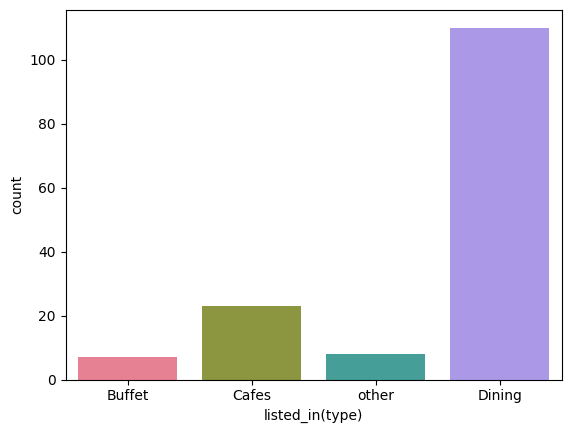

In [101]:
sns.countplot(x = df['listed_in(type)'], palette="husl", legend=False)

2) How many votes has each type of restaurant received from customers?

In [82]:
total_votes = df.groupby('listed_in(type)')['votes'].sum()
total_votes

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Votes')

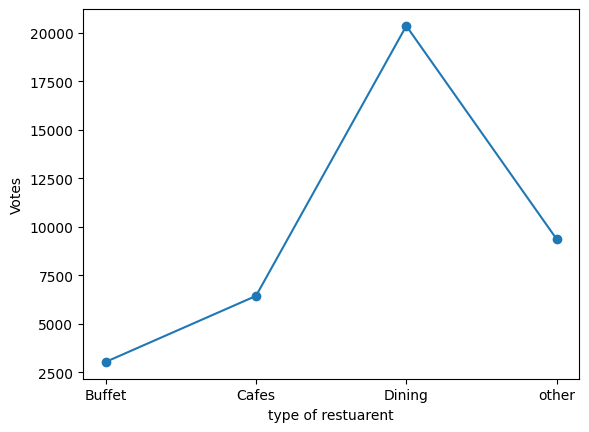

In [83]:
plt.plot(total_votes, marker="o")
plt.xlabel('type of restuarent')
plt.ylabel('Votes')

Dining Type Restuarant got maximum votes

3) What are the ratings that the majority of restaurants have received?

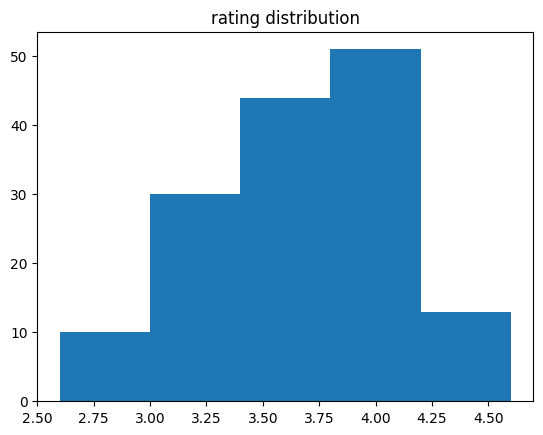

In [91]:
plt.hist(df['rate'], bins=5)
plt.title('rating distribution')
plt.show()

Majority restuarant got 3.5 to 4 ratings

4) Zomato has observed that most couples order most of their food online. What is their spending range on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

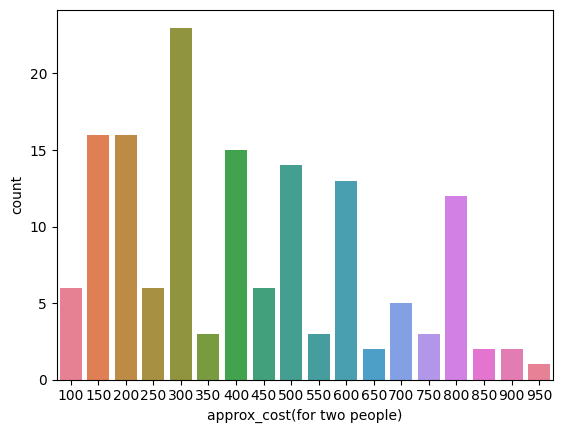

In [ ]:
couple_data = df['approx_cost(for two people)']

sns.countplot(x=couple_data, hue=couple_data, palette="husl", legend=False)

Majority couple order around 300

5) Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

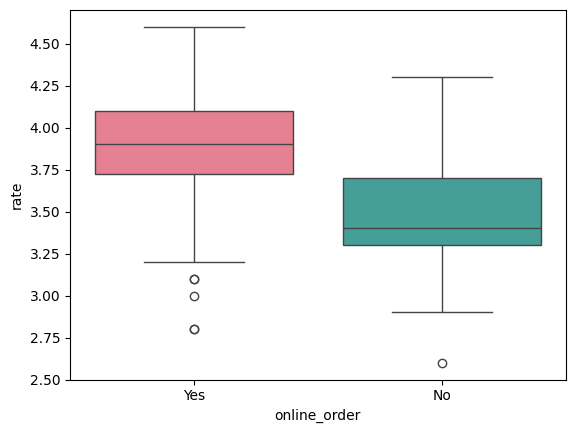

In [111]:
sns.boxplot(x = 'online_order',y = 'rate', data = df,hue='online_order', palette='husl')

online has received the maximum rating

6) Which type of restaurant received more offline orders, so that Zomato can provide those 
customers with some good offers?

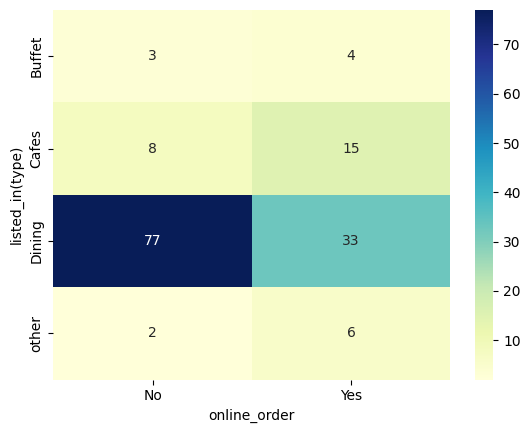

In [114]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.show()